# Case Study: K-means Clustering in Python

## Customer Segmentation
Problem: we don’t know if we have different types of customers and how to approach them
Goals: We want to understand better our customers; We want to have clear criteria to segment our customers
Why? To perform specific actions to improve the customer experience

# Techniques: k-means
Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).

### Wholesale customers Data Set. Abreu, N. (2011).

This dataset has the following attributes:

FRESH: annual spending (m.u.) on fresh products (Continuous);

MILK: annual spending (m.u.) on milk products (Continuous);

GROCERY: annual spending (m.u.) on grocery products (Continuous);

FROZEN: annual spending (m.u.) on frozen products (Continuous)

DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);

CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)

REGION: customers Region of Lisbon, Oporto or Other (Nominal)

In [125]:
import pandas as pd
df=pd.read_csv("Wholesale_customers_data.csv")

In [126]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [127]:
df.shape

(440, 8)

In [128]:
df.loc[df['Channel']==1, 'Horeca']=1
df.loc[df['Channel']!=1, 'Horeca']=0
df.loc[df['Channel']==2, 'Retail']=1
df.loc[df['Channel']!=2, 'Retail']=0
df.loc[df['Region']==1, 'Lisbon']=1
df.loc[df['Region']!=1, 'Lisbon']=0
df.loc[df['Region']==2, 'Oporto']=1
df.loc[df['Region']!=2, 'Oporto']=0
df.loc[df['Region']==3, 'Others']=1
df.loc[df['Region']!=3, 'Others']=0

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0
5,9413,8259,5126,666,1795,1451,0.0,1.0,0.0,0.0,1.0
6,12126,3199,6975,480,3140,545,0.0,1.0,0.0,0.0,1.0
7,7579,4956,9426,1669,3321,2566,0.0,1.0,0.0,0.0,1.0
8,5963,3648,6192,425,1716,750,1.0,0.0,0.0,0.0,1.0
9,6006,11093,18881,1159,7425,2098,0.0,1.0,0.0,0.0,1.0


In [129]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,0.677273,0.322727,0.1750,0.106818,0.718182
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.468052,0.468052,0.3804,0.309234,0.450397
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000,0.000000,0.0000,0.000000,1.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,1.000000,1.000000,0.0000,0.000000,1.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,1.000000,1.000000,1.0000,1.000000,1.000000


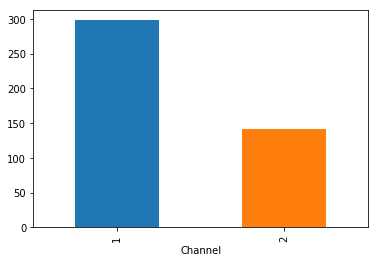

In [130]:
df.groupby(df['Channel'])['Fresh'].count().plot.bar()

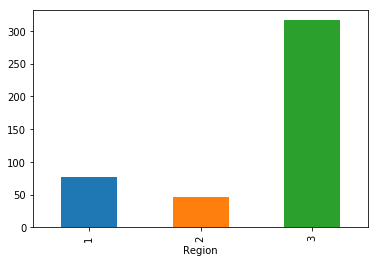

In [131]:
df.groupby(df['Region'])['Fresh'].count().plot.bar()

In [133]:
df=df.drop(['Channel','Region'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aaf0278>,
      dtype=object)

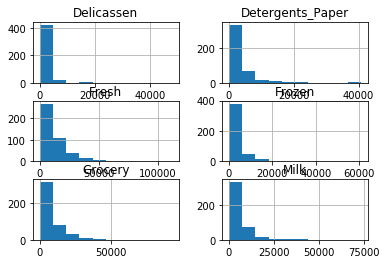

In [111]:
%matplotlib inline  
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].hist()

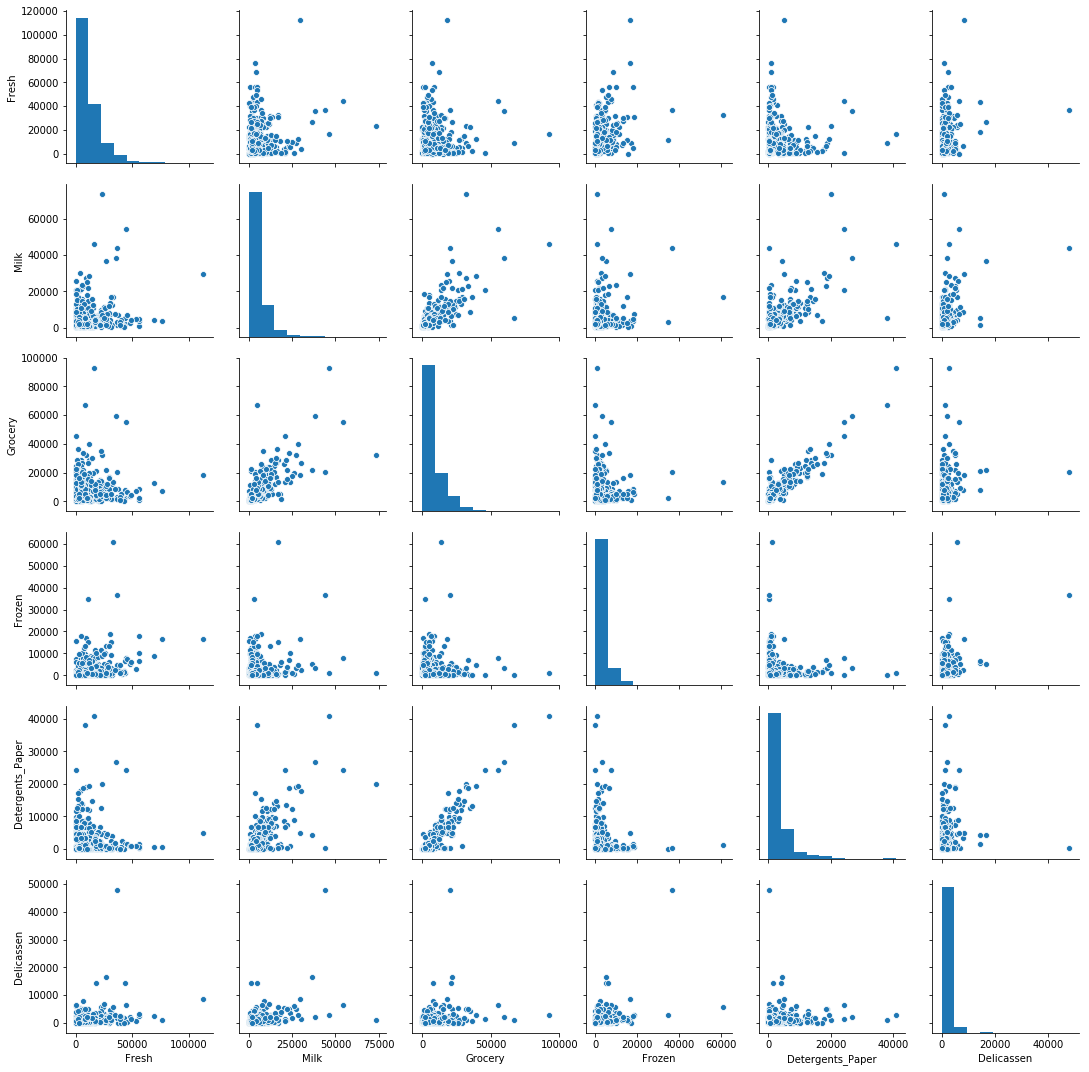

In [93]:
sns.pairplot(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

In [134]:
from sklearn import cluster, datasets, decomposition, preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Normalize and scale all variables to make sure 
1. all continous variables are nomally distributed;
2. all variables are on the same scale.

In [96]:
normalized = preprocessing.quantile_transform(df, output_distribution='normal')

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2553: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing.data` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (440). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


#### This method transforms the features to follow a uniform or a normal distribution. 
Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [97]:
scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(normalized)
scaled = scaler.transform(normalized)

#### This method transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

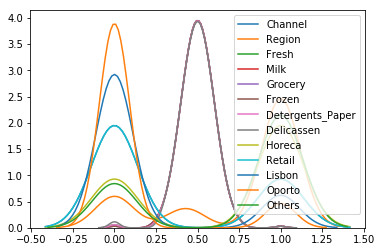

In [101]:
import seaborn as sns
df_scaled = pd.DataFrame(scaled, columns=df.columns)
for i in df.columns:
    sns.kdeplot(df_scaled[i])
    

## Quick Clustering

In [147]:
clusterer = KMeans(n_clusters=5, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

In [148]:
df.groupby(df['cluster'], as_index=False).mean().to_csv('1130/quick_result.csv')

In [149]:
df.groupby(df['cluster'], as_index=False)["Fresh"].count()

,cluster,Fresh
0,0,211
1,1,59
2,2,105
3,3,37
4,4,28


In [150]:
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels
df.groupby(df['cluster'], as_index=False).mean().to_csv('1130/quick_result_3.csv')

In [152]:
df.groupby(df['cluster'], as_index=False)["Fresh"].count()

,cluster,Fresh
0,0,211
1,1,87
2,2,142


## How to find an optimal solution?

- K: scree plot, how similar are groups
- seed: silouette score, how "accurately" are observations assigned
- number of iterations: until change is minimal

In [160]:
def scree(dat, max_clust=10):
    if type(dat) != np.ndarray:
        dat = np.array(dat)
    ss = []
    ss.append(sum(np.var(dat, axis=0)) * (len(dat)-1))
    
    for i in range(2, max_clust+1):
        ssw = []
        k_means = cluster.KMeans(n_clusters=i,max_iter=150).fit(dat)
        clust = k_means.labels_
        for j in set(clust):
            ssw.append(sum(np.var(dat[clust == j], axis=0) * (len(dat[clust==j]) - 1)))
        ss.append(sum(ssw))
    
    clust_index = range(1,max_clust+1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    plt.plot(clust_index,ss, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Total Within Sums of Squares")
    print(ss)
    plt.show()

[577.2308724261777, 281.73158039911675, 139.6923349139717, 81.91854066668321, 40.84502407389401, 21.132099246449606, 18.491948733616795, 16.98271901138064, 15.870220371145255, 15.077283397772444]


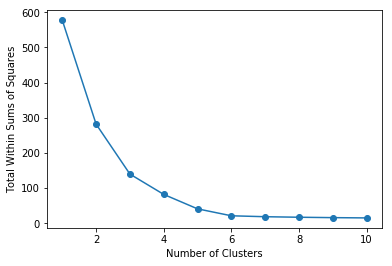

In [161]:
scree(df_scaled)

In [180]:
df_scaled=df_scaled.drop(['Channel', 'Region'], axis=1)

In [181]:
import matplotlib.cm as cm

def silhouette(dat, range_n_clusters = range(2, 11)):
    
    range_n_clusters = np.array(range_n_clusters)
    dat = np.array(dat)
    sil_avg = []
    n_clust = []
    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(dat) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(dat)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(dat, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sil_avg.append(silhouette_avg)
        n_clust.append(n_clusters)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(dat, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            cmap = cm.get_cmap("Spectral")
            color = cmap(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        cmap = cm.get_cmap("Spectral")
        colors = cmap(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(dat[:, 1], dat[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()
    max_ind = sil_avg.index(max(sil_avg))
    print("Recommended clusters is %d with an average silhouette of %.4f" % (n_clust[max_ind], round(sil_avg[max_ind], 4)))

For n_clusters = 2 The average silhouette_score is : 0.5440989501351104


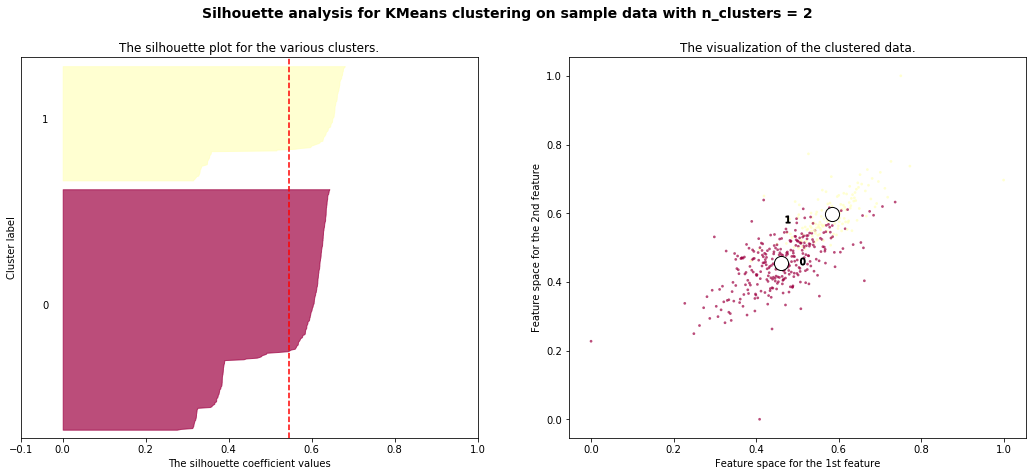

For n_clusters = 3 The average silhouette_score is : 0.6359341615283873


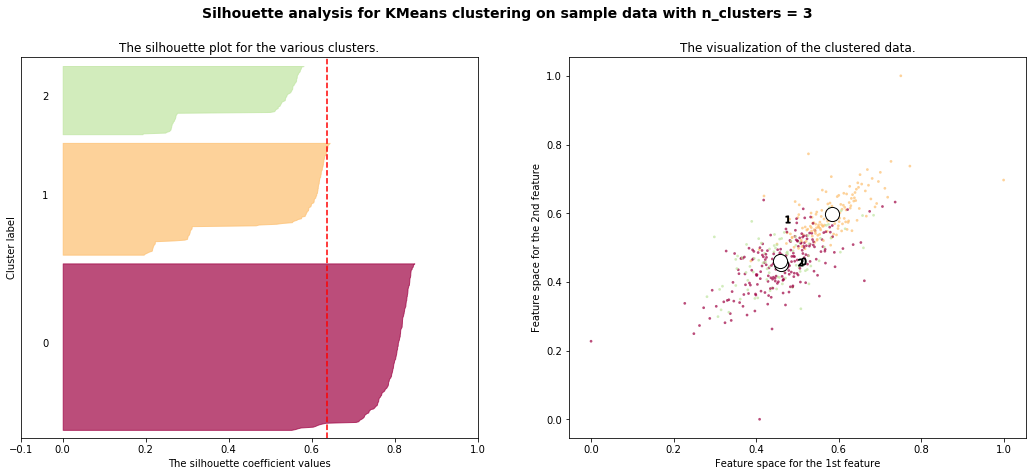

For n_clusters = 4 The average silhouette_score is : 0.7092187157309955


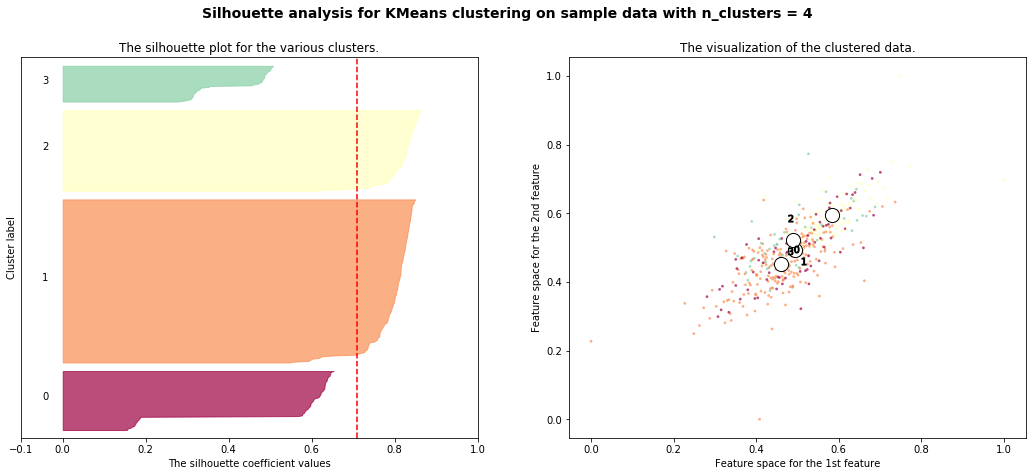

For n_clusters = 5 The average silhouette_score is : 0.7677579328839518


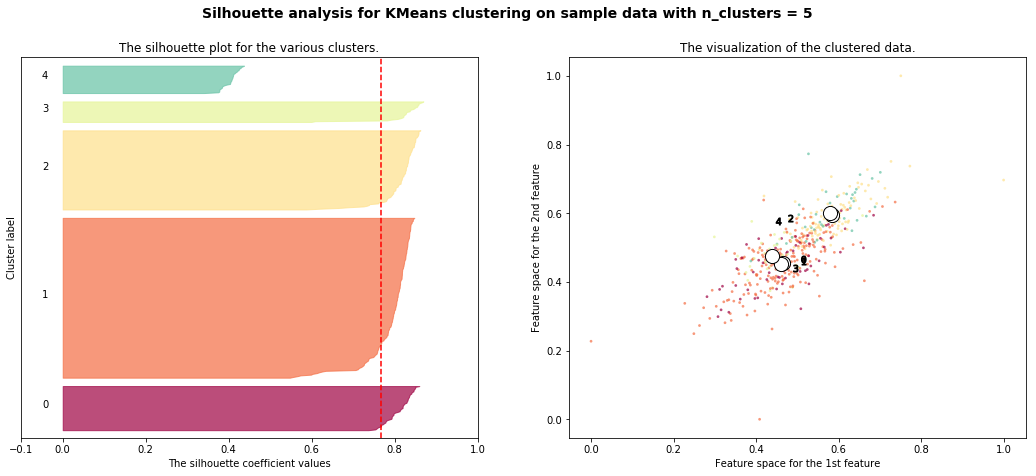

For n_clusters = 6 The average silhouette_score is : 0.8033156066651589


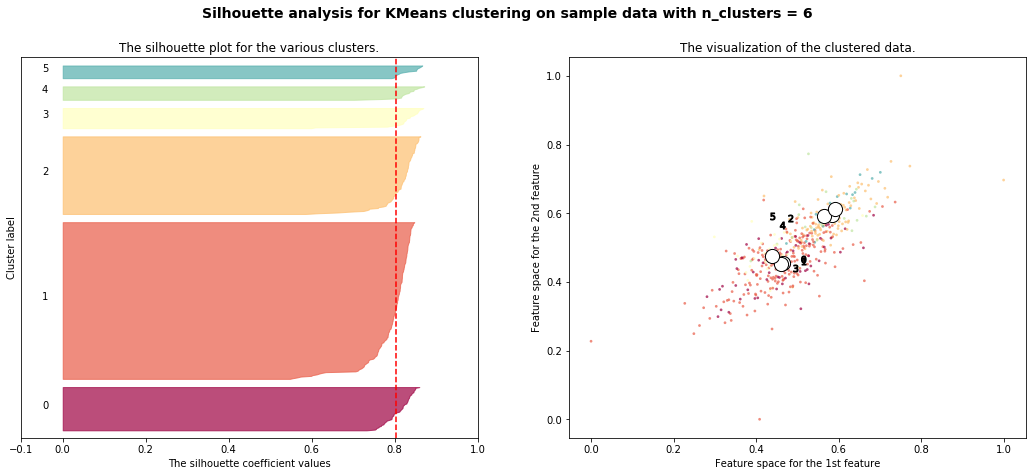

For n_clusters = 7 The average silhouette_score is : 0.524830724775122


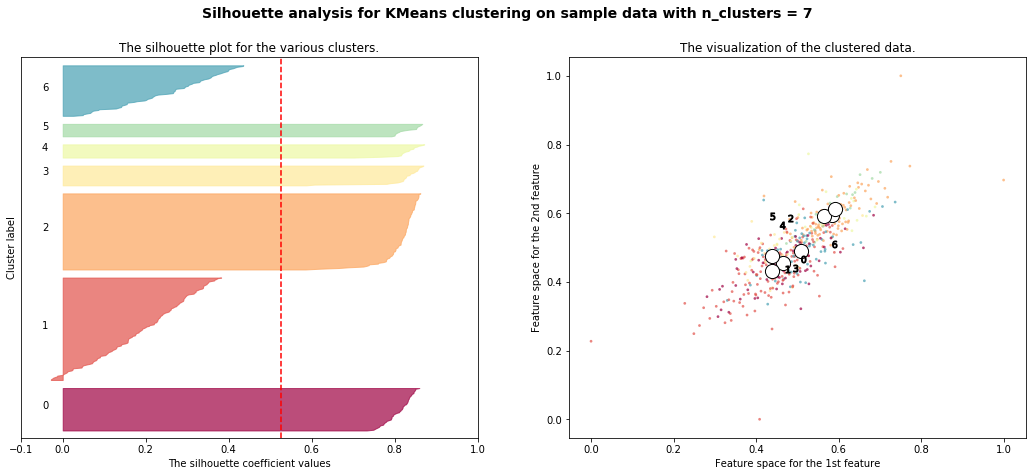

For n_clusters = 8 The average silhouette_score is : 0.5198743156454434


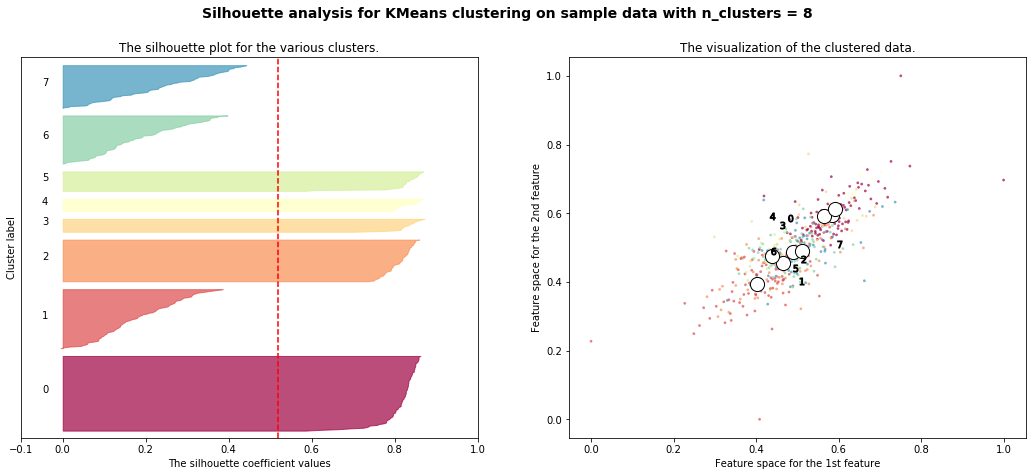

For n_clusters = 9 The average silhouette_score is : 0.3842583526267837


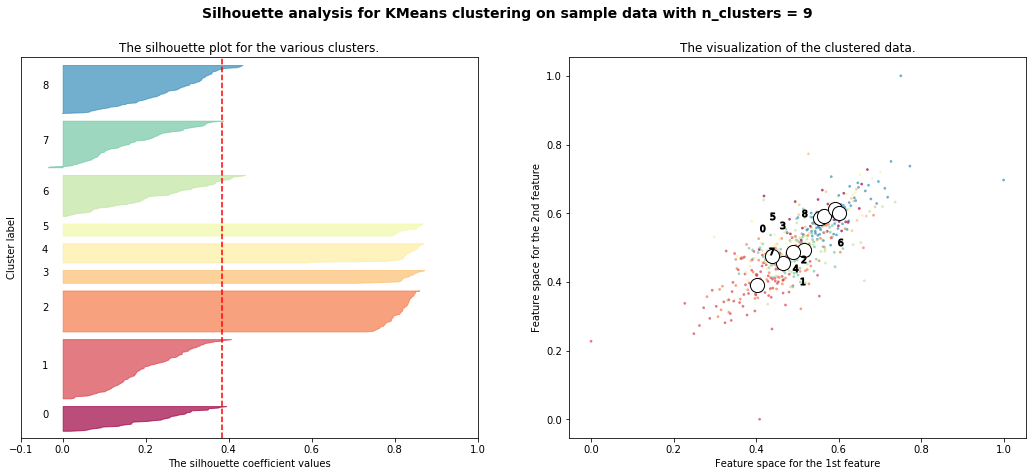

For n_clusters = 10 The average silhouette_score is : 0.36975066563589704


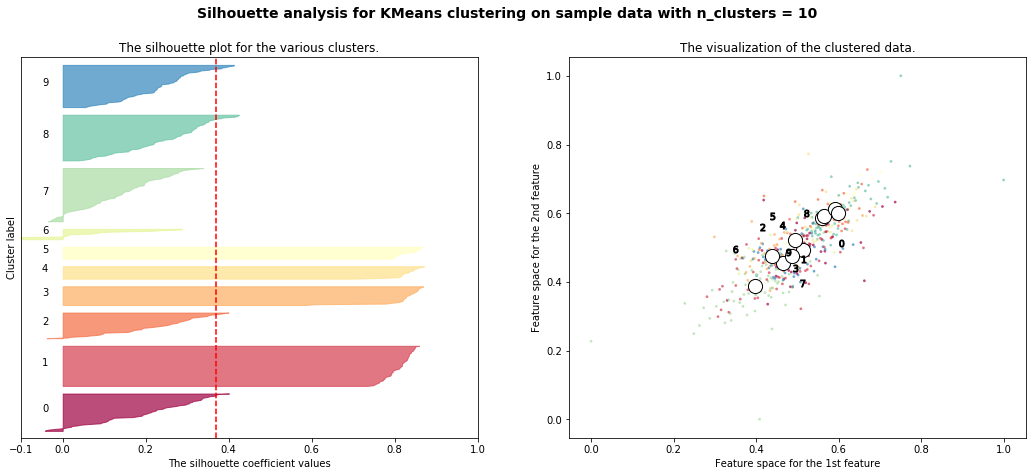

Recommended clusters is 6 with an average silhouette of 0.8033


In [182]:
silhouette(df_scaled)

## PCA or not?

In [162]:
import numpy as np
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
df_scaled_pca=pca.fit_transform(df_scaled)

In [114]:
df_scaled_pca

array([[ 1.22087203, -0.25763611, -0.10220813],
       [ 1.22034606, -0.25537886, -0.10050251],
       [ 1.22103589, -0.25473132, -0.10185206],
       ...,
       [ 1.24807317, -0.25175616, -0.1045177 ],
       [-0.50734845, -0.49242304, -0.02095485],
       [-0.49839291, -0.49231136, -0.0194263 ]])

## Other approaches
- K-medoids
- GMM
- hierarchical clustering